# 1. Technology Stocks Section

In [10]:
import pandas as pd
import yfinance as yf
import numpy as np

In [11]:
nasdaq_100 = pd.read_csv('Nasdaq_100.csv')
nasdaq_100.head()

,Ticker
0,AAPL
1,NVDA
2,MSFT
3,AMZN
4,GOOG


In [12]:
len(nasdaq_100)

101

In [13]:
# Create a list to store information
data = []

# Retrieve sector information for each stock ticker
for ticker in nasdaq_100['Ticker']:
    try:
        stock = yf.Ticker(ticker)
        info = stock.info
        data.append([ticker, info.get('sector', 'N/A'), info.get('industry', 'N/A')])
    except Exception as e:
        print(f"Unable to retrieve information for {ticker}: {e}")

# Convert the list into a DataFrame
nasdaq_100_sectors = pd.DataFrame(data, columns=['Ticker', 'Sector', 'Industry'])

print(nasdaq_100_sectors)

    Ticker                  Sector                        Industry
0     AAPL              Technology            Consumer Electronics
1     NVDA              Technology                  Semiconductors
2     MSFT              Technology       Software - Infrastructure
3     AMZN       Consumer Cyclical                 Internet Retail
4     GOOG  Communication Services  Internet Content & Information
..     ...                     ...                             ...
96    BIIB              Healthcare    Drug Manufacturers - General
97    ILMN              Healthcare          Diagnostics & Research
98    MRNA              Healthcare                   Biotechnology
99    DLTR      Consumer Defensive                 Discount Stores
100    WBA              Healthcare        Pharmaceutical Retailers

[101 rows x 3 columns]


In [14]:
# Filter stocks belonging to the 'Technology' sector
tech_stocks = nasdaq_100_sectors[nasdaq_100_sectors['Sector'] == 'Technology']
print(tech_stocks)

   Ticker      Sector                             Industry
0    AAPL  Technology                 Consumer Electronics
1    NVDA  Technology                       Semiconductors
2    MSFT  Technology            Software - Infrastructure
8    AVGO  Technology                       Semiconductors
12   ASML  Technology  Semiconductor Equipment & Materials
13   CSCO  Technology              Communication Equipment
14   ADBE  Technology            Software - Infrastructure
16    AMD  Technology                       Semiconductors
20    TXN  Technology                       Semiconductors
21   INTU  Technology               Software - Application
22   QCOM  Technology                       Semiconductors
27   AMAT  Technology  Semiconductor Equipment & Materials
28    ARM  Technology                       Semiconductors
30   PANW  Technology            Software - Infrastructure
31    ADP  Technology               Software - Application
35     MU  Technology                       Semiconducto

In [15]:
# Group data by the 'Industry' column
grouped_industry = tech_stocks.groupby('Industry')

# Display information for each group
for industry, group in grouped_industry:
    print(f"Industry: {industry}")
    print(group)
    print("-" * 50)

# Count the number of stocks in each industry
stock_counts = tech_stocks.groupby('Industry').size()
print("Number of stocks in each industry:")
print(stock_counts)

Industry: Communication Equipment
   Ticker      Sector                 Industry
13   CSCO  Technology  Communication Equipment
--------------------------------------------------
Industry: Consumer Electronics
  Ticker      Sector              Industry
0   AAPL  Technology  Consumer Electronics
--------------------------------------------------
Industry: Information Technology Services
   Ticker      Sector                         Industry
78   CTSH  Technology  Information Technology Services
95    CDW  Technology  Information Technology Services
--------------------------------------------------
Industry: Semiconductor Equipment & Materials
   Ticker      Sector                             Industry
12   ASML  Technology  Semiconductor Equipment & Materials
27   AMAT  Technology  Semiconductor Equipment & Materials
39   LRCX  Technology  Semiconductor Equipment & Materials
45   KLAC  Technology  Semiconductor Equipment & Materials
--------------------------------------------------
Ind

In [16]:
tech_tickers = tech_stocks['Ticker'].tolist()
tech_data = yf.download(tech_tickers, start='2023-01-01')['Close']
tech_data.head()

[*********************100%***********************]  41 of 41 completed


Ticker,AAPL,ADBE,ADI,ADP,ADSK,AMAT,AMD,ANSS,ARM,ASML,...,PANW,PAYX,QCOM,ROP,SNPS,TEAM,TTD,TXN,WDAY,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03 00:00:00+00:00,125.070000,336.920013,162.449997,237.660004,185.149994,96.730003,64.019997,238.639999,NaN,549.570007,...,138.449997,115.809998,107.199997,434.459991,319.679993,126.500000,44.020000,163.210007,169.350006,110.190002
2023-01-04 00:00:00+00:00,126.360001,341.410004,165.910004,238.779999,187.960007,99.309998,64.660004,242.940002,NaN,570.830017,...,138.539993,117.070000,111.529999,442.739990,320.929993,126.400002,44.310001,169.169998,171.220001,111.589996
2023-01-05 00:00:00+00:00,125.019997,328.440002,159.690002,233.630005,182.070007,97.919998,62.330002,231.649994,NaN,565.320007,...,135.110001,114.360001,109.400002,435.920013,315.040009,119.970001,42.590000,166.929993,160.190002,104.389999
2023-01-06 00:00:00+00:00,129.619995,332.750000,165.520004,240.160004,187.190002,104.269997,63.959999,239.410004,NaN,595.849976,...,134.850006,117.449997,115.339996,443.670013,320.540009,121.279999,42.290001,175.160004,161.139999,103.959999
2023-01-09 00:00:00+00:00,130.149994,341.980011,167.100006,239.509995,192.470001,106.489998,67.239998,247.990005,NaN,621.330017,...,135.080002,117.410004,114.610001,443.410004,325.950012,127.169998,43.990002,176.679993,162.929993,104.750000


In [17]:
percent_null = tech_data.isnull().sum()/len(tech_data ) * 100 
print(percent_null)

Ticker
AAPL     0.000000
ADBE     0.000000
ADI      0.000000
ADP      0.000000
ADSK     0.000000
AMAT     0.000000
AMD      0.000000
ANSS     0.000000
ARM     36.307054
ASML     0.000000
AVGO     0.000000
CDNS     0.000000
CDW      0.000000
CRWD     0.000000
CSCO     0.000000
CTSH     0.000000
DDOG     0.000000
FTNT     0.000000
GFS      0.000000
INTC     0.000000
INTU     0.000000
KLAC     0.000000
LRCX     0.000000
MCHP     0.000000
MDB      0.000000
MRVL     0.000000
MSFT     0.000000
MU       0.000000
NVDA     0.000000
NXPI     0.000000
ON       0.000000
PANW     0.000000
PAYX     0.000000
QCOM     0.000000
ROP      0.000000
SNPS     0.000000
TEAM     0.000000
TTD      0.000000
TXN      0.000000
WDAY     0.000000
ZS       0.000000
dtype: float64


In [18]:
tech_tickers.remove('ARM')
len(tech_tickers)

40

# 2. Metrics Calculation and Stock Screening

## Fundamental Analysis

In [21]:
# Time period
start_date, end_date = pd.Timestamp("2022-10-01"), pd.Timestamp("2024-10-01")

# Helper function to safely retrieve a value
def get_value(df, date, column):
    return df.loc[date, column] if column in df.columns else np.nan

In [22]:
# Function to process each ticker
def process_ticker(ticker):
    try:
        stock = yf.Ticker(ticker)
        info = stock.info  # Retrieve general information about the ticker
        income, balance = stock.financials.T, stock.balance_sheet.T
        price = stock.history(start=start_date, end=end_date)['Close'].mean()
        latest_date = income.index[(income.index >= start_date) & (income.index <= end_date)].max()
        if pd.isna(latest_date): return None

        # Extract financial metrics
        net_income = get_value(income, latest_date, 'Net Income')
        revenue = get_value(income, latest_date, 'Total Revenue')
        equity = get_value(balance, latest_date, 'Total Stockholder Equity')
        if pd.isna(equity):
            total_assets = get_value(balance, latest_date, 'Total Assets')
            total_liabilities = get_value(balance, latest_date, 'Total Liabilities Net Minority Interest')
            equity = total_assets - total_liabilities if not pd.isna(total_assets) and not pd.isna(total_liabilities) else np.nan

        # Calculate financial ratios
        eps = net_income / get_value(balance, latest_date, 'Ordinary Shares Number') if not pd.isna(net_income) else np.nan
        roe = net_income / equity if equity else np.nan
        gross_margin = (revenue - get_value(income, latest_date, 'Cost Of Revenue')) / revenue if revenue else np.nan
        debt_to_equity = get_value(balance, latest_date, 'Total Debt') / equity if equity else np.nan
        prev_date = income.index[income.index < latest_date].max()
        revenue_growth = ((revenue / get_value(income, prev_date, 'Total Revenue')) - 1) if prev_date and revenue else np.nan

        # Return the results
        return {
            'Ticker': ticker,
            'Industry': info.get('industry', 'Unknown'),
            'ROE': roe,
            'Gross Margin': gross_margin,
            'Debt-to-Equity': debt_to_equity,
            'EPS': eps,
            'Revenue Growth': revenue_growth,
            'PE': price / eps if eps else np.nan
        }
    except Exception as e:
        print(f"Error processing {ticker}: {e}")
        return None

# Process and create DataFrame
financial_data = pd.DataFrame(filter(None, map(process_ticker, tech_tickers)))

# Display results
financial_data.head()

Error processing ADSK: Timestamp('2024-01-31 00:00:00')


,Ticker,Industry,ROE,Gross Margin,Debt-to-Equity,EPS,Revenue Growth,PE
0,AAPL,Consumer Electronics,1.645935,0.462063,1.872327,6.200789,0.020220,28.569645
1,NVDA,Semiconductors,0.692447,0.727176,0.257248,1.207792,1.258545,46.951078
2,MSFT,Software - Infrastructure,0.328281,0.697644,0.250029,11.855798,0.156700,28.747214
3,AVGO,Semiconductors,0.587044,0.689299,1.635359,3.401449,0.078788,28.563976
4,ASML,Semiconductor Equipment & Materials,0.582721,0.512949,0.344295,19.925184,0.301562,36.743279


## Quantitative Analysis

In [24]:
# Fetch historical adjusted close prices for the stocks
price_data = yf.download(list(financial_data['Ticker']),  start='2022-10-01',end='2024-10-01' )['Close']

# Fetch historical adjusted close prices for the S&P 500 index
sp500_data = yf.download("^GSPC",  start='2022-10-01',end='2024-10-01')['Close']

[*********************100%***********************]  39 of 39 completed
[*********************100%***********************]  1 of 1 completed


In [25]:
# Handle timezone issue: Convert all timestamps to tz-naive
price_data.index = price_data.index.tz_localize(None)
sp500_data.index = sp500_data.index.tz_localize(None)

# Calculate daily returns
returns = np.log(price_data / price_data.shift(1)).dropna()
market_returns = np.log(sp500_data / sp500_data.shift(1)).dropna()

# Synchronize data
aligned_returns, aligned_market_returns = returns.align(market_returns, join='inner', axis=0)
# Calculate Beta
betas = {}
for ticker in financial_data['Ticker']:
    if ticker in aligned_returns.columns:
        cov_with_market = np.cov(aligned_returns[ticker], aligned_market_returns)[0][1]
        market_variance = np.var(aligned_market_returns)
        betas[ticker] = cov_with_market / market_variance

# Add Beta to DataFrame
financial_data['Beta'] = financial_data['Ticker'].map(betas)

# Calculate Sharpe Ratio
risk_free_rate = 0.048/252  # U.S. 1-year Treasury Bond at the end of 2023
sharpe_ratios = (aligned_returns.mean() - risk_free_rate) / aligned_returns.std()
financial_data['SharpeRatio'] = financial_data['Ticker'].map(sharpe_ratios)

# Check correlation before calculating Beta
correlations = aligned_returns.corrwith(aligned_market_returns)
financial_data['CorrelationWithMarket'] = financial_data['Ticker'].map(correlations)

# Display results
financial_data

,Ticker,Industry,ROE,Gross Margin,Debt-to-Equity,EPS,Revenue Growth,PE,Beta,SharpeRatio,CorrelationWithMarket
0,AAPL,Consumer Electronics,1.645935,0.462063,1.872327,6.200789,0.020220,28.569645,1.209992,0.050676,0.720252
1,NVDA,Semiconductors,0.692447,0.727176,0.257248,1.207792,1.258545,46.951078,2.338388,0.131969,0.660560
2,MSFT,Software - Infrastructure,0.328281,0.697644,0.250029,11.855798,0.156700,28.747214,1.276566,0.060181,0.737510
3,AVGO,Semiconductors,0.587044,0.689299,1.635359,3.401449,0.078788,28.563976,1.757139,0.098879,0.656506
4,ASML,Semiconductor Equipment & Materials,0.582721,0.512949,0.344295,19.925184,0.301562,36.743279,1.976136,0.043800,0.717336
5,CSCO,Communication Equipment,0.227028,0.647324,0.681127,2.575493,-0.056055,18.489137,0.741948,0.024561,0.535633
6,ADBE,Software - Infrastructure,0.328611,0.878716,0.247003,11.929670,0.102408,39.673761,1.414617,0.045827,0.603141
7,AMD,Semiconductors,0.015279,0.461199,0.053729,0.528465,-0.039024,228.275042,2.099391,0.051981,0.625032
8,TXN,Semiconductors,0.385275,0.628974,0.664201,7.161716,-0.125275,23.506530,1.264620,0.019423,0.710082
9,INTU,Software - Application,0.160718,0.787228,0.356205,10.572024,0.133421,49.349911,1.513224,0.035010,0.700193


In [26]:
# Group the financial data by 'Industry'
grouped_by_industry = financial_data.groupby('Industry')

# Select the top 3 stocks from each industry based on 'ROE' and 'SharpeRatio'
top_industry_stocks = grouped_by_industry.apply(
    lambda x: x.nlargest(3, ['ROE', 'Gross Margin','SharpeRatio'])  # Rank stocks within each industry
)

# Display the result
print(top_industry_stocks)

                                       Ticker  \
Industry                                        
Communication Equipment             5    CSCO   
Consumer Electronics                0    AAPL   
Information Technology Services     38    CDW   
                                    31   CTSH   
Semiconductor Equipment & Materials 19   KLAC   
                                    4    ASML   
                                    17   LRCX   
Semiconductors                      1    NVDA   
                                    3    AVGO   
                                    10   QCOM   
Software - Application              13    ADP   
                                    29   PAYX   
                                    21   CDNS   
Software - Infrastructure           12   PANW   
                                    6    ADBE   
                                    2    MSFT   

                                                                   Industry  \
Industry                              

C:\Users\Phuong Anh\AppData\Local\Temp\ipykernel_11636\885757825.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_industry_stocks = grouped_by_industry.apply(


In [27]:
from sklearn.preprocessing import StandardScaler

# Normalize the financial metrics using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(top_industry_stocks[['ROE', 'SharpeRatio', 'Revenue Growth', 'PE','Beta']])

# Convert the scaled data into a DataFrame for easier manipulation
scaled_df = pd.DataFrame(scaled_data, 
                         columns=['ROE_Z', 'SharpeRatio_Z', 'RevenueGrowth_Z', 'PE_Z','Beta_Z'], 
                         index=top_industry_stocks.index)

# Add the normalized columns back to the original DataFrame
top_industry_stocks = pd.concat([top_industry_stocks, scaled_df], axis=1)

# Calculate a composite score (Score) using weighted normalized metrics
top_industry_stocks['Score'] = (
    top_industry_stocks['ROE_Z'] * 0.3 +              
    top_industry_stocks['SharpeRatio_Z'] * 0.3 +      
    top_industry_stocks['RevenueGrowth_Z'] * 0.2 +     
    top_industry_stocks['PE_Z'] * 0.1 +               
    top_industry_stocks['Beta_Z'] * 0.1               
)

# Display the results with relevant columns
print(top_industry_stocks[['Ticker', 'ROE', 'SharpeRatio', 'Revenue Growth', 'PE','Beta', 'Score']])

                                       Ticker       ROE  SharpeRatio  \
Industry                                                               
Communication Equipment             5    CSCO  0.227028     0.024561   
Consumer Electronics                0    AAPL  1.645935     0.050676   
Information Technology Services     38    CDW  0.540661     0.031065   
                                    31   CTSH  0.160732     0.021742   
Semiconductor Equipment & Materials 19   KLAC  0.819961     0.064652   
                                    4    ASML  0.582721     0.043800   
                                    17   LRCX  0.448246     0.048645   
Semiconductors                      1    NVDA  0.692447     0.131969   
                                    3    AVGO  0.587044     0.098879   
                                    10   QCOM  0.386009     0.023637   
Software - Application              13    ADP  0.825051     0.012597   
                                    29   PAYX  0.444725     0.00

In [28]:
# Select the top 5 stocks with the highest scores across the entire portfolio
top_5_stocks = top_industry_stocks.nlargest(5, 'Score')

# Display the results with relevant metrics
print(top_5_stocks[['Ticker', 'ROE', 'SharpeRatio', 'PE', 'Beta', 'Score']])

                                       Ticker       ROE  SharpeRatio  \
Industry                                                               
Semiconductors                      1    NVDA  0.692447     0.131969   
Consumer Electronics                0    AAPL  1.645935     0.050676   
Semiconductors                      3    AVGO  0.587044     0.098879   
Semiconductor Equipment & Materials 19   KLAC  0.819961     0.064652   
                                    4    ASML  0.582721     0.043800   

                                               PE      Beta     Score  
Industry                                                               
Semiconductors                      1   46.951078  2.338388  2.027524  
Consumer Electronics                0   28.569645  1.209992  0.889807  
Semiconductors                      3   28.563976  1.757139  0.575835  
Semiconductor Equipment & Materials 19  26.076693  1.830499  0.349651  
                                    4   36.743279  1.976136  0.

# Portfolio Weighting Optimization

In [30]:
symbols = top_5_stocks['Ticker']
noa = len(symbols)
d = pd.DataFrame()
for symbol in symbols:
     d[symbol] = yf.download(symbol,start = '2023-10-01', end = '2024-10-01')['Close']
d

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,NVDA,AAPL,AVGO,KLAC,ASML
Date,,,,,
2023-10-02,44.782001,173.750000,83.495003,460.630005,582.179993
2023-10-03,43.516998,172.399994,81.483002,451.839996,570.599976
2023-10-04,44.041000,173.660004,82.380997,461.049988,590.859985
2023-10-05,44.688000,174.910004,82.386002,461.079987,581.690002
2023-10-06,45.762001,177.490005,84.526001,468.049988,597.359985
...,...,...,...,...,...
2024-09-24,120.870003,227.369995,174.839996,770.340027,814.000000
2024-09-25,123.510002,226.369995,175.520004,772.059998,818.179993
2024-09-26,124.040001,227.520004,178.089996,804.549988,852.440002


<Axes: xlabel='Date'>

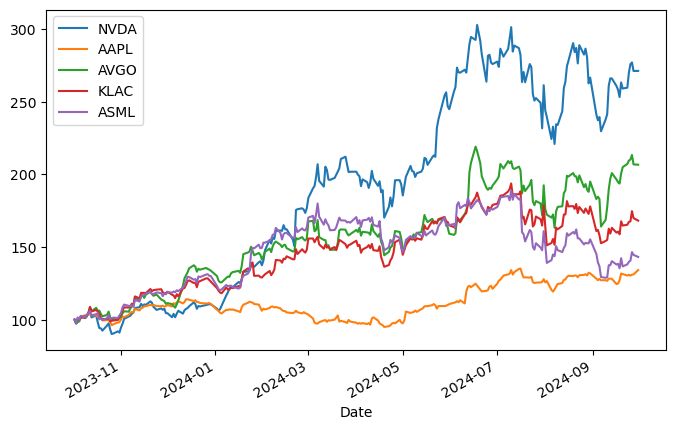

In [31]:
(d / d.iloc[0] * 100).plot(figsize=(8, 5))

In [32]:
weights = np.random.random(noa)
weights /= np.sum(weights)

In [33]:
rets = np.log(d / d.shift(1))
rets.mean() * 252
rets.cov() * 252


,NVDA,AAPL,AVGO,KLAC,ASML
NVDA,0.265686,0.035926,0.163010,0.142005,0.139924
AAPL,0.035926,0.049302,0.035566,0.033599,0.031621
AVGO,0.163010,0.035566,0.205822,0.142198,0.129258
KLAC,0.142005,0.033599,0.142198,0.164701,0.143415
ASML,0.139924,0.031621,0.129258,0.143415,0.174237


In [34]:
np.sum(rets.mean() * weights) * 252 # expected portfolio return
np.dot(weights.T, np.dot(rets.cov() * 252, weights)) # expected variance
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights))) # expected portfolio standard deviation/volatility

0.3262800158071265

In [35]:
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T,
    np.dot(rets.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

Text(0.5, 1.0, 'Risk-return scatter plot')

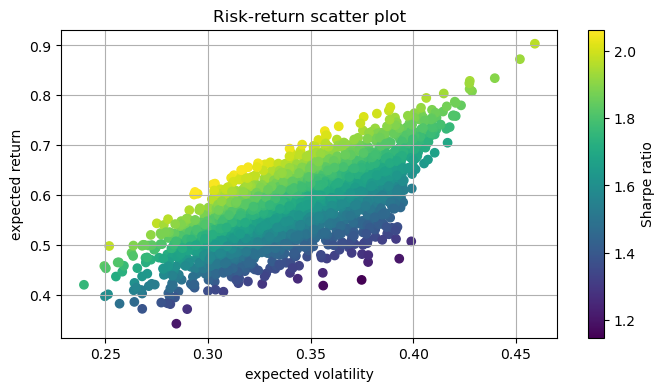

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c=prets / pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.title('Risk-return scatter plot')

In [37]:
def statistics(weights):
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

import scipy.optimize as sco

def min_func_sharpe(weights):
    return -statistics(weights)[2]

def sum_constraint(x):
    return  np.sum(x) - 1

cons =  ({'type': 'eq', 'fun': sum_constraint})
bnds = tuple((0, 0.4) for _ in range(noa))

noa * [1. / noa,]
opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], 
bounds=bnds, constraints=cons)

opts
opts['x'].round(3)
statistics(opts['x']).round(3)

array([0.667, 0.319, 2.089])

In [38]:
weight = opts['x'].round(3)
print(f"Q4.2024: {weight}")

Q4.2024: [0.4 0.4 0.2 0.  0. ]


In [39]:
def min_func_variance(weights):
    return statistics(weights)[1] ** 2
optv = sco.minimize(min_func_variance, noa * [1. / noa,],
method='SLSQP', bounds=bnds, constraints=cons)
optv['x'].round(3)
statistics(optv['x']).round(3)

array([0.428, 0.28 , 1.53 ])

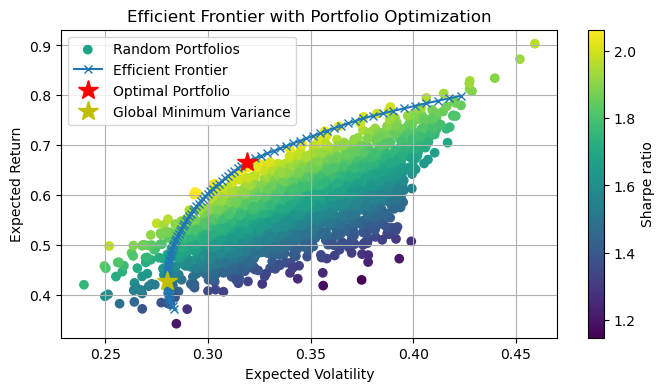

In [40]:
def min_func_port(weights):
    return statistics(weights)[1]  # Expected volatility

trets = np.linspace(0.0, 1, 200)  
tvols = []  

for tret in trets:
    cons = (
        {'type': 'eq', 'fun': sum_constraint},  
        {'type': 'eq', 'fun': lambda w: statistics(w)[0] - tret}  )
    res = sco.minimize(min_func_port,noa * [1. / noa], method='SLSQP',bounds=bnds, constraints=cons)
    if res.success:
        tvols.append(res['fun'])  
    else:
        tvols.append(np.nan) 

tvols = np.array(tvols)

# Create Efficient Frontier
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c=prets / pvols, marker='o', label='Random Portfolios')  
plt.plot(tvols, trets,  marker='x', label='Efficient Frontier')  # Efficient Frontier
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0], 'r*', markersize=15.0, label='Optimal Portfolio')  # Highest Sharpe Ratio
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0], 'y*', markersize=15.0, label='Global Minimum Variance')  # Minimum variance portfolio
plt.colorbar(label='Sharpe ratio')
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier with Portfolio Optimization')
plt.legend()
plt.show()

# 4. Performance Evaluation

In [42]:
d_test = pd.DataFrame()
for symbol in symbols:
     d_test[symbol] = yf.download(symbol,start='2024-10-01', end = '2024-12-01')['Close']
d_test.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,NVDA,AAPL,AVGO,KLAC,ASML
Date,,,,,
2024-10-01,117.000000,226.210007,167.470001,753.690002,822.349976
2024-10-02,118.849998,226.779999,170.660004,777.359985,832.190002
2024-10-03,122.849998,225.669998,171.889999,774.559998,832.409973
2024-10-04,124.919998,226.800003,176.639999,787.390015,833.000000
2024-10-07,127.720001,221.690002,175.080002,781.669983,817.250000


In [43]:
tech_portfolio= pd.DataFrame ({'Symbol':symbols, 'Weight':weight})
tech_portfolio

Symbol  Weight
Industry                                             
Semiconductors                      1    NVDA     0.4
Consumer Electronics                0    AAPL     0.4
Semiconductors                      3    AVGO     0.2
Semiconductor Equipment & Materials 19   KLAC     0.0
                                    4    ASML     0.0

In [44]:
# Fetch the benchmark data for S&P 500 index
benchmark = yf.download('^GSPC', start='2024-10-01', end = '2024-12-01')['Close']

[*********************100%***********************]  1 of 1 completed


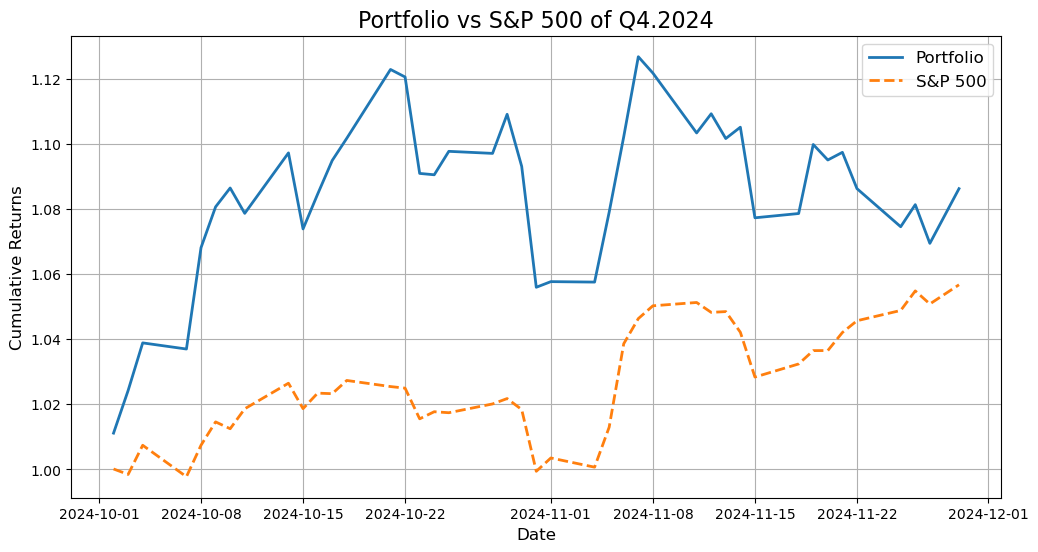

In [45]:
import matplotlib.pyplot as plt

# Calculate daily returns for the portfolio and benchmark
returns = d_test.pct_change().dropna()  # Percentage change for portfolio data
benchmark_returns = benchmark.pct_change().dropna()  # Percentage change for benchmark data

# Calculate portfolio returns using weights
portfolio_returns = (returns * weight).sum(axis=1)  # Weighted sum of returns for all assets

# Calculate cumulative returns for the portfolio and benchmark
portfolio_cum_returns = (1 + portfolio_returns).cumprod()  
benchmark_cum_returns = (1 + benchmark_returns).cumprod()  

# Plot the comparison of cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(portfolio_cum_returns, label='Portfolio', linewidth=2)  # Plot portfolio cumulative returns
plt.plot(benchmark_cum_returns, label='S&P 500', linestyle='--', linewidth=2)  # Plot benchmark cumulative returns
plt.title('Portfolio vs S&P 500 of Q4.2024', fontsize=16)  
plt.xlabel('Date', fontsize=12) 
plt.ylabel('Cumulative Returns', fontsize=12)  
plt.legend(fontsize=12) 
plt.grid(True)  
plt.show()

# Backtesting

## Q3.2024

In [48]:
# Time period
start_date, end_date = pd.Timestamp("2022-07-01"), pd.Timestamp("2024-07-01")

# Helper function to safely retrieve a value
def get_value(df, date, column):
    return df.loc[date, column] if column in df.columns else np.nan

# Function to process each ticker
def process_ticker(ticker):
    try:
        stock = yf.Ticker(ticker)
        info = stock.info  # Retrieve general information about the ticker
        income, balance = stock.financials.T, stock.balance_sheet.T
        price = stock.history(start=start_date, end=end_date)['Close'].mean()
        latest_date = income.index[(income.index >= start_date) & (income.index <= end_date)].max()
        if pd.isna(latest_date): return None

        # Extract financial metrics
        net_income = get_value(income, latest_date, 'Net Income')
        revenue = get_value(income, latest_date, 'Total Revenue')
        equity = get_value(balance, latest_date, 'Total Stockholder Equity')
        if pd.isna(equity):
            total_assets = get_value(balance, latest_date, 'Total Assets')
            total_liabilities = get_value(balance, latest_date, 'Total Liabilities Net Minority Interest')
            equity = total_assets - total_liabilities if not pd.isna(total_assets) and not pd.isna(total_liabilities) else np.nan

        # Calculate financial ratios
        eps = net_income / get_value(balance, latest_date, 'Ordinary Shares Number') if not pd.isna(net_income) else np.nan
        roe = net_income / equity if equity else np.nan
        gross_margin = (revenue - get_value(income, latest_date, 'Cost Of Revenue')) / revenue if revenue else np.nan
        debt_to_equity = get_value(balance, latest_date, 'Total Debt') / equity if equity else np.nan
        prev_date = income.index[income.index < latest_date].max()
        revenue_growth = ((revenue / get_value(income, prev_date, 'Total Revenue')) - 1) if prev_date and revenue else np.nan

        # Return the results
        return {
            'Ticker': ticker,
            'Industry': info.get('industry', 'Unknown'),
            'ROE': roe,
            'Gross Margin': gross_margin,
            'Debt-to-Equity': debt_to_equity,
            'EPS': eps,
            'Revenue Growth': revenue_growth,
            'PE': price / eps if eps else np.nan
        }
    except Exception as e:
        print(f"Error processing {ticker}: {e}")
        return None

# Process and create DataFrame
financial_data = pd.DataFrame(filter(None, map(process_ticker, tech_tickers)))

# Display results
financial_data.head()

Error processing ADSK: Timestamp('2024-01-31 00:00:00')


,Ticker,Industry,ROE,Gross Margin,Debt-to-Equity,EPS,Revenue Growth,PE
0,AAPL,Consumer Electronics,1.560760,0.441311,1.787533,6.237596,-0.028005,27.008950
1,NVDA,Semiconductors,0.692447,0.727176,0.257248,1.207792,1.258545,36.128643
2,MSFT,Software - Infrastructure,0.328281,0.697644,0.250029,11.855798,0.156700,26.942985
3,AVGO,Semiconductors,0.587044,0.689299,1.635359,3.401449,0.078788,24.387213
4,ASML,Semiconductor Equipment & Materials,0.582721,0.512949,0.344295,19.925184,0.301562,34.171610


In [49]:
# Fetch historical adjusted close prices for the stocks
price_data = yf.download(list(financial_data['Ticker']),  start='2022-07-01',end='2024-07-01' )['Close']

# Fetch historical adjusted close prices for the S&P 500 index
sp500_data = yf.download("^GSPC",  start='2022-07-01',end='2024-07-01')['Close']

# Handle timezone issue: Convert all timestamps to tz-naive
price_data.index = price_data.index.tz_localize(None)
sp500_data.index = sp500_data.index.tz_localize(None)

# Calculate daily returns
returns = np.log(price_data / price_data.shift(1)).dropna()
market_returns = np.log(sp500_data / sp500_data.shift(1)).dropna()

# Synchronize data
aligned_returns, aligned_market_returns = returns.align(market_returns, join='inner', axis=0)
# Calculate Beta
betas = {}
for ticker in financial_data['Ticker']:
    if ticker in aligned_returns.columns:
        cov_with_market = np.cov(aligned_returns[ticker], aligned_market_returns)[0][1]
        market_variance = np.var(aligned_market_returns)
        betas[ticker] = cov_with_market / market_variance

# Add Beta to DataFrame
financial_data['Beta'] = financial_data['Ticker'].map(betas)

# Calculate Sharpe Ratio
risk_free_rate = 0.048/252  
sharpe_ratios = (aligned_returns.mean() - risk_free_rate) / aligned_returns.std()
financial_data['SharpeRatio'] = financial_data['Ticker'].map(sharpe_ratios)

# Check correlation before calculating Beta
correlations = aligned_returns.corrwith(aligned_market_returns)
financial_data['CorrelationWithMarket'] = financial_data['Ticker'].map(correlations)

[*********************100%***********************]  39 of 39 completed
[*********************100%***********************]  1 of 1 completed


In [50]:
# Group the financial data by 'Industry'
grouped_by_industry = financial_data.groupby('Industry')

# Select the top 3 stocks from each industry based on 'ROE' and 'SharpeRatio'
top_industry_stocks = grouped_by_industry.apply(lambda x: x.nlargest(3, ['ROE', 'Gross Margin','SharpeRatio']))

from sklearn.preprocessing import StandardScaler

# Normalize the financial metrics using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(top_industry_stocks[['ROE', 'SharpeRatio', 'Revenue Growth', 'PE','Beta']])

# Convert the scaled data into a DataFrame for easier manipulation
scaled_df = pd.DataFrame(scaled_data, 
                         columns=['ROE_Z', 'SharpeRatio_Z', 'RevenueGrowth_Z', 'PE_Z','Beta_Z'], 
                         index=top_industry_stocks.index)

# Add the normalized columns back to the original DataFrame
top_industry_stocks = pd.concat([top_industry_stocks, scaled_df], axis=1)

# Calculate a composite score (Score) using weighted normalized metrics
top_industry_stocks['Score'] = (
    top_industry_stocks['ROE_Z'] * 0.3 +              
    top_industry_stocks['SharpeRatio_Z'] * 0.3 +      
    top_industry_stocks['RevenueGrowth_Z'] * 0.2 +     
    top_industry_stocks['PE_Z'] * 0.1 +               
    top_industry_stocks['Beta_Z'] * 0.1)

# Select the top 5 stocks with the highest scores across the entire portfolio
top_5_stocks = top_industry_stocks.nlargest(5, 'Score')

# Display the results with relevant metrics
print(top_5_stocks[['Ticker', 'ROE', 'SharpeRatio', 'PE', 'Beta', 'Score']])

                                       Ticker       ROE  SharpeRatio  \
Industry                                                               
Semiconductors                      1    NVDA  0.692447     0.126758   
Consumer Electronics                0    AAPL  1.560760     0.039323   
Semiconductors                      3    AVGO  0.587044     0.100510   
Semiconductor Equipment & Materials 19   KLAC  0.819961     0.080715   
                                    4    ASML  0.582721     0.059621   

                                               PE      Beta     Score  
Industry                                                               
Semiconductors                      1   36.128643  2.142452  1.729942  
Consumer Electronics                0   27.008950  1.229249  0.759266  
Semiconductors                      3   24.387213  1.488627  0.472577  
Semiconductor Equipment & Materials 19  23.314788  1.617053  0.472511  
                                    4   34.171610  1.812187  0.

C:\Users\Phuong Anh\AppData\Local\Temp\ipykernel_11636\2615624630.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_industry_stocks = grouped_by_industry.apply(lambda x: x.nlargest(3, ['ROE', 'Gross Margin','SharpeRatio']))


In [51]:
symbols = top_5_stocks['Ticker']
noa = len(symbols)
d = pd.DataFrame()
for symbol in symbols:
     d[symbol] = yf.download(symbol,start = '2023-07-01', end = '2024-07-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [52]:
weights = np.random.random(noa)
weights /= np.sum(weights)
rets = np.log(d / d.shift(1))
rets.mean() * 252
rets.cov() * 252
np.sum(rets.mean() * weights) * 252 # expected portfolio return
np.dot(weights.T, np.dot(rets.cov() * 252, weights)) # expected variance
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights))) # expected portfolio standard deviation/volatility
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T,
    np.dot(rets.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)


def statistics(weights):
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

import scipy.optimize as sco
def min_func_sharpe(weights):
    return -statistics(weights)[2]
def sum_constraint(x):
    return  np.sum(x) - 1
cons = ({'type': 'eq', 'fun': sum_constraint})
bnds = tuple((0, 0.4) for _ in range(noa))

noa * [1. / noa,]
opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], 
bounds=bnds, constraints=cons)

opts
weight = opts['x'].round(3)
print(f"Q3.2024: {weight}")

Q3.2024: [0.4   0.052 0.223 0.325 0.   ]


In [53]:
d_test = pd.DataFrame()
for symbol in symbols:
     d_test[symbol] = yf.download(symbol,start ='2024-07-01',end= '2024-10-01')['Adj Close']
d_test

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,NVDA,AAPL,AVGO,KLAC,ASML
Date,,,,,
2024-07-01,124.289368,216.261475,163.542099,823.992065,1029.169434
2024-07-02,122.659508,219.773544,165.204636,835.260071,1043.509277
2024-07-03,128.269028,221.050659,172.355118,849.414856,1066.931030
2024-07-05,125.819237,225.829849,169.772598,851.286255,1069.988037
2024-07-08,128.189026,227.306534,174.013657,862.574219,1072.885986
...,...,...,...,...,...
2024-09-24,120.870003,227.120117,174.839996,768.208740,812.098938
2024-09-25,123.510002,226.121216,175.520004,769.923950,816.269165
2024-09-26,124.040001,227.269958,178.089996,802.324036,850.449219


[*********************100%***********************]  1 of 1 completed


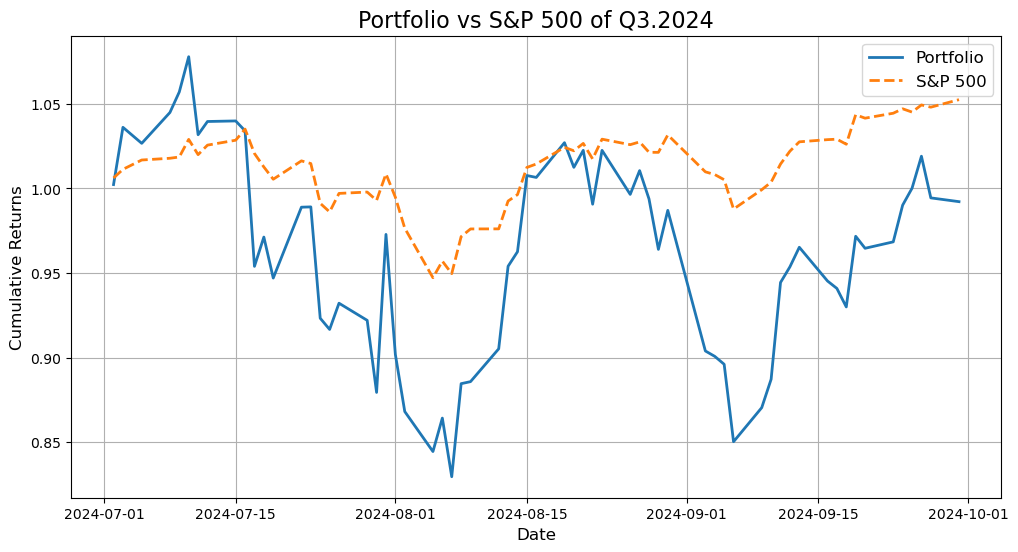

In [54]:
tech_portfolio= pd.DataFrame ({'Symbol':symbols, 'Weight':weight})
# Fetch the benchmark data for S&P 500 index
benchmark = yf.download('^GSPC', start ='2024-07-01',end= '2024-10-01')['Adj Close']
import matplotlib.pyplot as plt

# Calculate daily returns for the portfolio and benchmark
returns = d_test.pct_change().dropna()  # Percentage change for portfolio data
benchmark_returns = benchmark.pct_change().dropna()  # Percentage change for benchmark data

# Calculate portfolio returns using weights
portfolio_returns = (returns * weight).sum(axis=1)  # Weighted sum of returns for all assets

# Calculate cumulative returns for the portfolio and benchmark
portfolio_cum_returns = (1 + portfolio_returns).cumprod()  
benchmark_cum_returns = (1 + benchmark_returns).cumprod()  

# Plot the comparison of cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(portfolio_cum_returns, label='Portfolio', linewidth=2)  # Plot portfolio cumulative returns
plt.plot(benchmark_cum_returns, label='S&P 500', linestyle='--', linewidth=2)  # Plot benchmark cumulative returns
plt.title('Portfolio vs S&P 500 of Q3.2024', fontsize=16)  
plt.xlabel('Date', fontsize=12) 
plt.ylabel('Cumulative Returns', fontsize=12)  
plt.legend(fontsize=12) 
plt.grid(True)  
plt.show()

## Q2.2024

In [56]:
# Time period
start_date, end_date = pd.Timestamp("2022-04-01"), pd.Timestamp("2024-04-01")

# Helper function to safely retrieve a value
def get_value(df, date, column):
    return df.loc[date, column] if column in df.columns else np.nan

# Function to process each ticker
def process_ticker(ticker):
    try:
        stock = yf.Ticker(ticker)
        info = stock.info  # Retrieve general information about the ticker
        income, balance = stock.financials.T, stock.balance_sheet.T
        price = stock.history(start=start_date, end=end_date)['Close'].mean()
        latest_date = income.index[(income.index >= start_date) & (income.index <= end_date)].max()
        if pd.isna(latest_date): return None

        # Extract financial metrics
        net_income = get_value(income, latest_date, 'Net Income')
        revenue = get_value(income, latest_date, 'Total Revenue')
        equity = get_value(balance, latest_date, 'Total Stockholder Equity')
        if pd.isna(equity):
            total_assets = get_value(balance, latest_date, 'Total Assets')
            total_liabilities = get_value(balance, latest_date, 'Total Liabilities Net Minority Interest')
            equity = total_assets - total_liabilities if not pd.isna(total_assets) and not pd.isna(total_liabilities) else np.nan

        # Calculate financial ratios
        eps = net_income / get_value(balance, latest_date, 'Ordinary Shares Number') if not pd.isna(net_income) else np.nan
        roe = net_income / equity if equity else np.nan
        gross_margin = (revenue - get_value(income, latest_date, 'Cost Of Revenue')) / revenue if revenue else np.nan
        debt_to_equity = get_value(balance, latest_date, 'Total Debt') / equity if equity else np.nan
        prev_date = income.index[income.index < latest_date].max()
        revenue_growth = ((revenue / get_value(income, prev_date, 'Total Revenue')) - 1) if prev_date and revenue else np.nan

        # Return the results
        return {
            'Ticker': ticker,
            'Industry': info.get('industry', 'Unknown'),
            'ROE': roe,
            'Gross Margin': gross_margin,
            'Debt-to-Equity': debt_to_equity,
            'EPS': eps,
            'Revenue Growth': revenue_growth,
            'PE': price / eps if eps else np.nan
        }
    except Exception as e:
        print(f"Error processing {ticker}: {e}")
        return None

# Process and create DataFrame
financial_data = pd.DataFrame(filter(None, map(process_ticker, tech_tickers)))

# Display results
financial_data.head()


Error processing ADSK: Timestamp('2024-01-31 00:00:00')


,Ticker,Industry,ROE,Gross Margin,Debt-to-Equity,EPS,Revenue Growth,PE
0,AAPL,Consumer Electronics,1.560760,0.441311,1.787533,6.237596,-0.028005,26.274889
1,NVDA,Semiconductors,0.692447,0.727176,0.257248,1.207792,1.258545,27.590068
2,MSFT,Software - Infrastructure,0.350887,0.689201,0.290777,9.736410,0.068820,30.813501
3,AVGO,Semiconductors,0.587044,0.689299,1.635359,3.401449,0.078788,21.209072
4,ASML,Semiconductor Equipment & Materials,0.582721,0.512949,0.344295,19.925184,0.301562,31.574421


In [57]:
# Fetch historical adjusted close prices for the stocks
price_data = yf.download(list(financial_data['Ticker']),  start='2022-04-01',end='2024-04-01' )['Close']

# Fetch historical adjusted close prices for the S&P 500 index
sp500_data = yf.download("^GSPC",  start='2022-04-01',end='2024-04-01')['Close']

# Handle timezone issue: Convert all timestamps to tz-naive
price_data.index = price_data.index.tz_localize(None)
sp500_data.index = sp500_data.index.tz_localize(None)

# Calculate daily returns
returns = np.log(price_data / price_data.shift(1)).dropna()
market_returns = np.log(sp500_data / sp500_data.shift(1)).dropna()

# Synchronize data
aligned_returns, aligned_market_returns = returns.align(market_returns, join='inner', axis=0)
# Calculate Beta
betas = {}
for ticker in financial_data['Ticker']:
    if ticker in aligned_returns.columns:
        cov_with_market = np.cov(aligned_returns[ticker], aligned_market_returns)[0][1]
        market_variance = np.var(aligned_market_returns)
        betas[ticker] = cov_with_market / market_variance

# Add Beta to DataFrame
financial_data['Beta'] = financial_data['Ticker'].map(betas)

# Calculate Sharpe Ratio
risk_free_rate = 0.048/252  # U.S. 1-year Treasury Bond at the end of 2023
sharpe_ratios = (aligned_returns.mean() - risk_free_rate) / aligned_returns.std()
financial_data['SharpeRatio'] = financial_data['Ticker'].map(sharpe_ratios)

# Check correlation before calculating Beta
correlations = aligned_returns.corrwith(aligned_market_returns)
financial_data['CorrelationWithMarket'] = financial_data['Ticker'].map(correlations)


[*********************100%***********************]  39 of 39 completed
[*********************100%***********************]  1 of 1 completed


In [58]:
# Group the financial data by 'Industry'
grouped_by_industry = financial_data.groupby('Industry')

# Select the top 3 stocks from each industry based on 'ROE' and 'SharpeRatio'
top_industry_stocks = grouped_by_industry.apply(lambda x: x.nlargest(3, ['ROE', 'Gross Margin','SharpeRatio']))


from sklearn.preprocessing import StandardScaler

# Normalize the financial metrics using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(top_industry_stocks[['ROE', 'SharpeRatio', 'Revenue Growth', 'PE','Beta']])

# Convert the scaled data into a DataFrame for easier manipulation
scaled_df = pd.DataFrame(scaled_data, 
                         columns=['ROE_Z', 'SharpeRatio_Z', 'RevenueGrowth_Z', 'PE_Z','Beta_Z'], 
                         index=top_industry_stocks.index)

# Add the normalized columns back to the original DataFrame
top_industry_stocks = pd.concat([top_industry_stocks, scaled_df], axis=1)

# Calculate a composite score (Score) using weighted normalized metrics
top_industry_stocks['Score'] = (
    top_industry_stocks['ROE_Z'] * 0.3 +              
    top_industry_stocks['SharpeRatio_Z'] * 0.3 +      
    top_industry_stocks['RevenueGrowth_Z'] * 0.2 +     
    top_industry_stocks['PE_Z'] * 0.1 +               
    top_industry_stocks['Beta_Z'] * 0.1)

# Display the results with relevant metrics
print(top_5_stocks[['Ticker', 'ROE', 'SharpeRatio', 'PE', 'Beta', 'Score']])

                                       Ticker       ROE  SharpeRatio  \
Industry                                                               
Semiconductors                      1    NVDA  0.692447     0.126758   
Consumer Electronics                0    AAPL  1.560760     0.039323   
Semiconductors                      3    AVGO  0.587044     0.100510   
Semiconductor Equipment & Materials 19   KLAC  0.819961     0.080715   
                                    4    ASML  0.582721     0.059621   

                                               PE      Beta     Score  
Industry                                                               
Semiconductors                      1   36.128643  2.142452  1.729942  
Consumer Electronics                0   27.008950  1.229249  0.759266  
Semiconductors                      3   24.387213  1.488627  0.472577  
Semiconductor Equipment & Materials 19  23.314788  1.617053  0.472511  
                                    4   34.171610  1.812187  0.

C:\Users\Phuong Anh\AppData\Local\Temp\ipykernel_11636\1746690595.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_industry_stocks = grouped_by_industry.apply(lambda x: x.nlargest(3, ['ROE', 'Gross Margin','SharpeRatio']))


In [59]:
symbols = top_5_stocks['Ticker']
noa = len(symbols)
d = pd.DataFrame()
for symbol in symbols:
     d[symbol] = yf.download(symbol,start = '2023-04-01', end = '2024-04-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [60]:
weights = np.random.random(noa)
weights /= np.sum(weights)
rets = np.log(d / d.shift(1))
rets.mean() * 252
rets.cov() * 252
np.sum(rets.mean() * weights) * 252 # expected portfolio return
np.dot(weights.T, np.dot(rets.cov() * 252, weights)) # expected variance
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights))) # expected portfolio standard deviation/volatility
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T,
    np.dot(rets.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)


def statistics(weights):
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

import scipy.optimize as sco
def min_func_sharpe(weights):
    return -statistics(weights)[2]
def sum_constraint(x):
    return  np.sum(x) - 1
cons = ({'type': 'eq', 'fun': sum_constraint})
bnds = tuple((0, 0.4) for _ in range(noa))

noa * [1. / noa,]
opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], 
bounds=bnds, constraints=cons)

opts
weight = opts['x'].round(3)
print(f"Q2.2024: {weight}")

Q2.2024: [0.4 0.  0.4 0.2 0. ]


In [61]:
d_test = pd.DataFrame()
for symbol in symbols:
     d_test[symbol] = yf.download(symbol,start ='2024-04-01',end= '2024-07-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


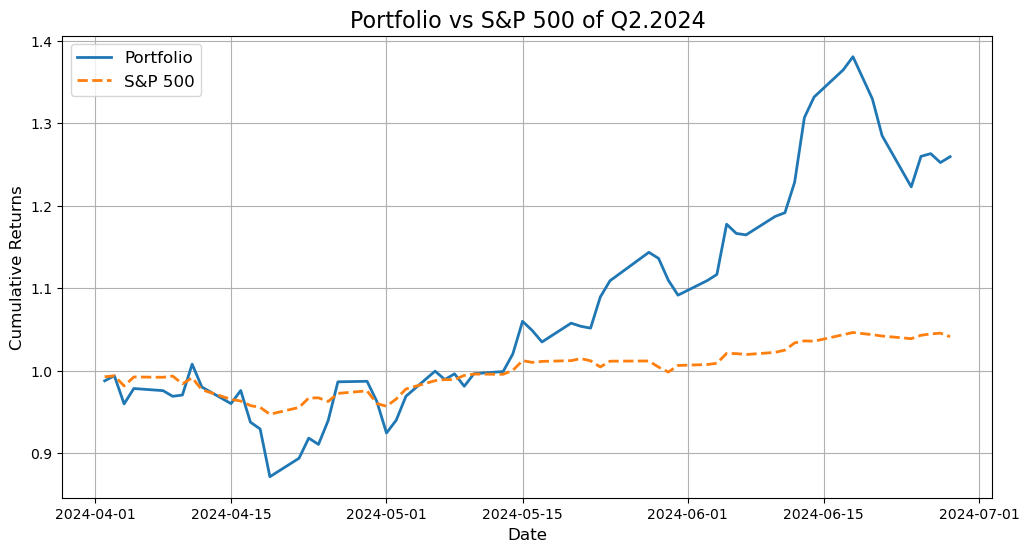

In [62]:
tech_portfolio= pd.DataFrame ({'Symbol':symbols, 'Weight':weight})
# Fetch the benchmark data for S&P 500 index
benchmark = yf.download('^GSPC', start ='2024-04-01',end= '2024-07-01')['Close']
import matplotlib.pyplot as plt

# Calculate daily returns for the portfolio and benchmark
returns = d_test.pct_change().dropna()  # Percentage change for portfolio data
benchmark_returns = benchmark.pct_change().dropna()  # Percentage change for benchmark data

# Calculate portfolio returns using weights
portfolio_returns = (returns * weight).sum(axis=1)  # Weighted sum of returns for all assets

# Calculate cumulative returns for the portfolio and benchmark
portfolio_cum_returns = (1 + portfolio_returns).cumprod()  
benchmark_cum_returns = (1 + benchmark_returns).cumprod()  

# Plot the comparison of cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(portfolio_cum_returns, label='Portfolio', linewidth=2)  # Plot portfolio cumulative returns
plt.plot(benchmark_cum_returns, label='S&P 500', linestyle='--', linewidth=2)  # Plot benchmark cumulative returns
plt.title('Portfolio vs S&P 500 of Q2.2024', fontsize=16)  
plt.xlabel('Date', fontsize=12) 
plt.ylabel('Cumulative Returns', fontsize=12)  
plt.legend(fontsize=12) 
plt.grid(True)  
plt.show()

## Q1.2024

In [64]:
# Time period
start_date, end_date = pd.Timestamp("2022-01-01"), pd.Timestamp("2024-01-01")

# Helper function to safely retrieve a value
def get_value(df, date, column):
    return df.loc[date, column] if column in df.columns else np.nan

# Function to process each ticker
def process_ticker(ticker):
    try:
        stock = yf.Ticker(ticker)
        info = stock.info  # Retrieve general information about the ticker
        income, balance = stock.financials.T, stock.balance_sheet.T
        price = stock.history(start=start_date, end=end_date)['Close'].mean()
        latest_date = income.index[(income.index >= start_date) & (income.index <= end_date)].max()
        if pd.isna(latest_date): return None

        # Extract financial metrics
        net_income = get_value(income, latest_date, 'Net Income')
        revenue = get_value(income, latest_date, 'Total Revenue')
        equity = get_value(balance, latest_date, 'Total Stockholder Equity')
        if pd.isna(equity):
            total_assets = get_value(balance, latest_date, 'Total Assets')
            total_liabilities = get_value(balance, latest_date, 'Total Liabilities Net Minority Interest')
            equity = total_assets - total_liabilities if not pd.isna(total_assets) and not pd.isna(total_liabilities) else np.nan

        # Calculate financial ratios
        eps = net_income / get_value(balance, latest_date, 'Ordinary Shares Number') if not pd.isna(net_income) else np.nan
        roe = net_income / equity if equity else np.nan
        gross_margin = (revenue - get_value(income, latest_date, 'Cost Of Revenue')) / revenue if revenue else np.nan
        debt_to_equity = get_value(balance, latest_date, 'Total Debt') / equity if equity else np.nan
        prev_date = income.index[income.index < latest_date].max()
        revenue_growth = ((revenue / get_value(income, prev_date, 'Total Revenue')) - 1) if prev_date and revenue else np.nan

        # Return the results
        return {
            'Ticker': ticker,
            'Industry': info.get('industry', 'Unknown'),
            'ROE': roe,
            'Gross Margin': gross_margin,
            'Debt-to-Equity': debt_to_equity,
            'EPS': eps,
            'Revenue Growth': revenue_growth,
            'PE': price / eps if eps else np.nan
        }
    except Exception as e:
        print(f"Error processing {ticker}: {e}")
        return None

# Process and create DataFrame
financial_data = pd.DataFrame(filter(None, map(process_ticker, tech_tickers)))

# Display results
financial_data.head()

,Ticker,Industry,ROE,Gross Margin,Debt-to-Equity,EPS,Revenue Growth,PE
0,AAPL,Consumer Electronics,1.560760,0.441311,1.787533,6.237596,-0.028005,25.973179
1,NVDA,Semiconductors,0.197638,0.569289,0.544365,0.177119,0.002229,155.444891
2,MSFT,Software - Infrastructure,0.350887,0.689201,0.290777,9.736410,0.068820,29.453388
3,AVGO,Semiconductors,0.587044,0.689299,1.635359,3.401449,0.078788,18.803946
4,ASML,Semiconductor Equipment & Materials,0.582721,0.512949,0.344295,19.925184,0.301562,30.161823


In [65]:
# Fetch historical adjusted close prices for the stocks
price_data = yf.download(list(financial_data['Ticker']),  start='2022-01-01',end='2024-01-01' )['Close']

# Fetch historical adjusted close prices for the S&P 500 index
sp500_data = yf.download("^GSPC",  start='2022-01-01',end='2024-01-01')['Close']

# Handle timezone issue: Convert all timestamps to tz-naive
price_data.index = price_data.index.tz_localize(None)
sp500_data.index = sp500_data.index.tz_localize(None)

# Calculate daily returns
returns = np.log(price_data / price_data.shift(1)).dropna()
market_returns = np.log(sp500_data / sp500_data.shift(1)).dropna()

# Synchronize data
aligned_returns, aligned_market_returns = returns.align(market_returns, join='inner', axis=0)
# Calculate Beta
betas = {}
for ticker in financial_data['Ticker']:
    if ticker in aligned_returns.columns:
        cov_with_market = np.cov(aligned_returns[ticker], aligned_market_returns)[0][1]
        market_variance = np.var(aligned_market_returns)
        betas[ticker] = cov_with_market / market_variance

# Add Beta to DataFrame
financial_data['Beta'] = financial_data['Ticker'].map(betas)

# Calculate Sharpe Ratio
risk_free_rate = 0.048/252  # U.S. 1-year Treasury Bond at the end of 2023
sharpe_ratios = (aligned_returns.mean() - risk_free_rate) / aligned_returns.std()
financial_data['SharpeRatio'] = financial_data['Ticker'].map(sharpe_ratios)

# Check correlation before calculating Beta
correlations = aligned_returns.corrwith(aligned_market_returns)
financial_data['CorrelationWithMarket'] = financial_data['Ticker'].map(correlations)


[*********************100%***********************]  40 of 40 completed
[*********************100%***********************]  1 of 1 completed


In [66]:
# Group the financial data by 'Industry'
grouped_by_industry = financial_data.groupby('Industry')

# Select the top 3 stocks from each industry based on 'ROE' and 'SharpeRatio'
top_industry_stocks = grouped_by_industry.apply(lambda x: x.nlargest(3, ['ROE', 'Gross Margin','SharpeRatio']))


from sklearn.preprocessing import StandardScaler

# Normalize the financial metrics using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(top_industry_stocks[['ROE', 'SharpeRatio', 'Revenue Growth', 'PE','Beta']])

# Convert the scaled data into a DataFrame for easier manipulation
scaled_df = pd.DataFrame(scaled_data, 
                         columns=['ROE_Z', 'SharpeRatio_Z', 'RevenueGrowth_Z', 'PE_Z','Beta_Z'], 
                         index=top_industry_stocks.index)

# Add the normalized columns back to the original DataFrame
top_industry_stocks = pd.concat([top_industry_stocks, scaled_df], axis=1)

# Calculate a composite score (Score) using weighted normalized metrics
top_industry_stocks['Score'] = (
    top_industry_stocks['ROE_Z'] * 0.3 +              
    top_industry_stocks['SharpeRatio_Z'] * 0.3 +      
    top_industry_stocks['RevenueGrowth_Z'] * 0.2 +     
    top_industry_stocks['PE_Z'] * 0.1 +               
    top_industry_stocks['Beta_Z'] * 0.1)

# Display the results with relevant metrics
print(top_5_stocks[['Ticker', 'ROE', 'SharpeRatio', 'PE', 'Beta', 'Score']])

                                       Ticker       ROE  SharpeRatio  \
Industry                                                               
Semiconductors                      1    NVDA  0.692447     0.126758   
Consumer Electronics                0    AAPL  1.560760     0.039323   
Semiconductors                      3    AVGO  0.587044     0.100510   
Semiconductor Equipment & Materials 19   KLAC  0.819961     0.080715   
                                    4    ASML  0.582721     0.059621   

                                               PE      Beta     Score  
Industry                                                               
Semiconductors                      1   36.128643  2.142452  1.729942  
Consumer Electronics                0   27.008950  1.229249  0.759266  
Semiconductors                      3   24.387213  1.488627  0.472577  
Semiconductor Equipment & Materials 19  23.314788  1.617053  0.472511  
                                    4   34.171610  1.812187  0.

C:\Users\Phuong Anh\AppData\Local\Temp\ipykernel_11636\1746690595.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_industry_stocks = grouped_by_industry.apply(lambda x: x.nlargest(3, ['ROE', 'Gross Margin','SharpeRatio']))


In [67]:
symbols = top_5_stocks['Ticker']
noa = len(symbols)
d = pd.DataFrame()
for symbol in symbols:
     d[symbol] = yf.download(symbol,start = '2023-01-01', end = '2024-01-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [68]:
weights = np.random.random(noa)
weights /= np.sum(weights)
rets = np.log(d / d.shift(1))
rets.mean() * 252
rets.cov() * 252
np.sum(rets.mean() * weights) * 252 # expected portfolio return
np.dot(weights.T, np.dot(rets.cov() * 252, weights)) # expected variance
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights))) # expected portfolio standard deviation/volatility
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T,
    np.dot(rets.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)


def statistics(weights):
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

import scipy.optimize as sco
def min_func_sharpe(weights):
    return -statistics(weights)[2]
def sum_constraint(x):
    return  np.sum(x) - 1
cons = ({'type': 'eq', 'fun': sum_constraint})
bnds = tuple((0, 0.4) for _ in range(noa))

noa * [1. / noa,]
opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], 
bounds=bnds, constraints=cons)

opts
weight = opts['x'].round(3)
print(f"Q1.2024: {weight}")

Q1.2024: [0.347 0.4   0.253 0.    0.   ]


In [69]:
d_test = pd.DataFrame()
for symbol in symbols:
     d_test[symbol] = yf.download(symbol,start ='2024-01-01',end= '2024-04-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


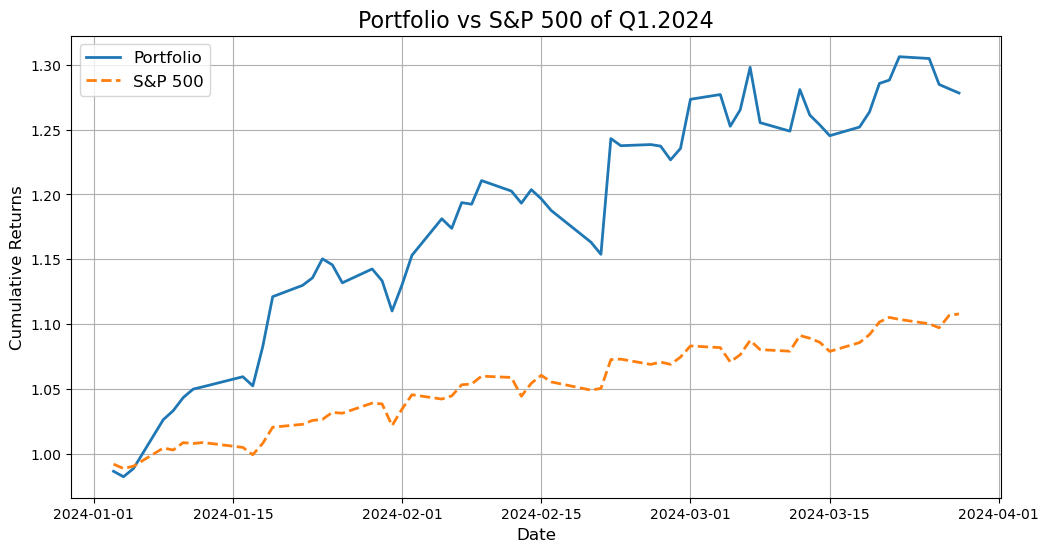

In [70]:
tech_portfolio= pd.DataFrame ({'Symbol':symbols, 'Weight':weight})
# Fetch the benchmark data for S&P 500 index
benchmark = yf.download('^GSPC', start ='2024-01-01',end= '2024-04-01')['Close']
import matplotlib.pyplot as plt

# Calculate daily returns for the portfolio and benchmark
returns = d_test.pct_change().dropna()  # Percentage change for portfolio data
benchmark_returns = benchmark.pct_change().dropna()  # Percentage change for benchmark data

# Calculate portfolio returns using weights
portfolio_returns = (returns * weight).sum(axis=1)  # Weighted sum of returns for all assets

# Calculate cumulative returns for the portfolio and benchmark
portfolio_cum_returns = (1 + portfolio_returns).cumprod()  
benchmark_cum_returns = (1 + benchmark_returns).cumprod()  

# Plot the comparison of cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(portfolio_cum_returns, label='Portfolio', linewidth=2)  # Plot portfolio cumulative returns
plt.plot(benchmark_cum_returns, label='S&P 500', linestyle='--', linewidth=2)  # Plot benchmark cumulative returns
plt.title('Portfolio vs S&P 500 of Q1.2024', fontsize=16)  
plt.xlabel('Date', fontsize=12) 
plt.ylabel('Cumulative Returns', fontsize=12)  
plt.legend(fontsize=12) 
plt.grid(True)  
plt.show()